<a href="https://colab.research.google.com/github/boazgajja/-Realtime-Ecommerce-Data-Pipeline-Analaytics-Dashboard/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#first using code
import numpy as np
import pandas as pd

def compute_entropy(labels):
    label_values, label_counts = np.unique(labels, return_counts=True)
    probabilities = label_counts / len(labels)
    return -np.sum(probabilities * np.log2(probabilities))

def calculate_info_gain(features, labels, feature_index):
    unique_values = np.unique(features[:, feature_index])
    weighted_entropy = 0
    for value in unique_values:
        subset_labels = labels[features[:, feature_index] == value]
        weighted_entropy += len(subset_labels) / len(labels) * compute_entropy(subset_labels)
    return compute_entropy(labels) - weighted_entropy

def find_best_feature(features, labels):
    info_gains = [calculate_info_gain(features, labels, i) for i in range(features.shape[1])]
    return np.argmax(info_gains)

def build_decision_tree(features, labels):
    if len(np.unique(labels)) == 1:
        return np.unique(labels)[0]
    if features.shape[1] == 0:
        return np.bincount(labels).argmax()

    best_feature_index = find_best_feature(features, labels)
    tree = {best_feature_index: {}}
    for value in np.unique(features[:, best_feature_index]):
        subset_features = features[features[:, best_feature_index] == value]
        subset_labels = labels[features[:, best_feature_index] == value]
        tree[best_feature_index][value] = build_decision_tree(np.delete(subset_features, best_feature_index, axis=1), subset_labels)
    return tree

# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE 303/LAB7:decision tree/dataset.csv')
features = data.iloc[:, :-1].values
labels = data.iloc[:, -1].values

# Build and print the decision tree
decision_tree = build_decision_tree(features, labels)
print(decision_tree)


{0: {1: 'no', 2: 'no', 3: 'yes', 4: 'yes', 5: 'yes', 6: 'no', 7: 'yes', 8: 'no', 9: 'yes', 10: 'yes', 11: 'yes', 12: 'yes', 13: 'yes', 14: 'no'}}


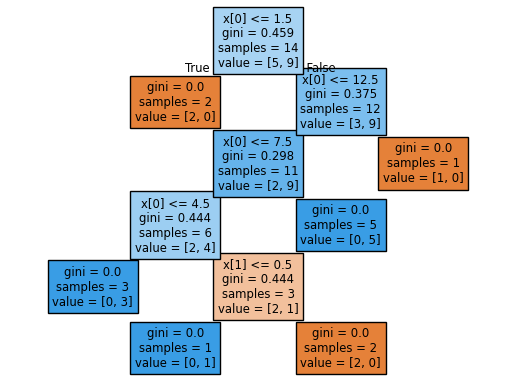

In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE 303/LAB7:decision tree/dataset.csv')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

le = LabelEncoder()
X = X.apply(le.fit_transform)
y = le.fit_transform(y)

model = DecisionTreeClassifier()
model.fit(X, y)

tree.plot_tree(model, filled=True)
plt.show()



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
iris_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CSE 303/LAB7:decision tree/iris.csv')

# Separate the features (X) and the target variable (y)
X = iris_dataset.iloc[:, :-1]
y = iris_dataset.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance
accuracy_score_value = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics with formatted output
print("\n--- Model Evaluation ---")
print(f"Accuracy:                 {accuracy_score_value:.4f}")
print("Confusion Matrix:")
print(confusion_mat)



--- Model Evaluation ---
Accuracy:                 1.0000
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
